In [1]:
#TODO: Include weather data in dataset
#TODO: Add custom callbacks (Model Checkpoint and Early Stopping)
#TODO: Check current model hyperparams (Gridsearch-like process)

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras

In [3]:
df = pd.read_csv(os.path.join("data", "final_df.csv"))

In [4]:
df_no_date = df.drop(columns=['Date 1', 'Date 2'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(df_no_date.drop(columns=['cell count']), df_no_date['cell count'], test_size=0.2, random_state=1)


In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)

In [6]:
svr_classifier = SVR()
svr_classifier.fit(x_train_scaled, y_train)
svr_prediction = svr_classifier.predict(x_test_scaled)

In [7]:
mean_squared_error(y_test, svr_prediction)

807.9972807319011

In [8]:
"""
params = [{
    'kernel': ["poly", "rbf", "sigmoid"],
    'gamma': ["scale", "auto"]    
}]


estimator = GridSearchCV(SVR(), params, scoring='r2', return_train_score=True)
estimator.fit(x_train_scaled, y_train)
best_params = estimator.best_params_

print(best_params)

print(estimator.best_score_)
"""
#OUTPUT
#{'gamma': 'scale', 'kernel': 'poly'}
#0.38909959034873987

'\nparams = [{\n    \'kernel\': ["poly", "rbf", "sigmoid"],\n    \'gamma\': ["scale", "auto"]    \n}]\n\n\nestimator = GridSearchCV(SVR(), params, scoring=\'r2\', return_train_score=True)\nestimator.fit(x_train_scaled, y_train)\nbest_params = estimator.best_params_\n\nprint(best_params)\n\nprint(estimator.best_score_)\n'

In [9]:
x_train_arr = np.array(x_train, np.float32)
x_test_arr = np.array(x_test, np.float32)

x_train_shaped = x_train_arr.reshape(x_train_arr.shape[0], 1, x_train_arr.shape[1])
x_test_shaped = x_test_arr.reshape(x_test_arr.shape[0], 1, x_test_arr.shape[1])

In [28]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_train_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 100)         33900     
                                                                 
 gru_3 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape_1 (Reshape)         (None, 12, 12)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 128)           6272      
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                      

In [29]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanSquaredError(), 'accuracy']
        )

In [30]:
history = model.fit(x_train_shaped,y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 7ms/step - loss: 13066.7939 - mean_squared_error: 13066.7939 - accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 13035.0625 - mean_squared_error: 13035.0625 - accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 13007.5039 - mean_squared_error: 13007.5039 - accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 12977.6016 - mean_squared_error: 12977.6016 - accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 12944.6533 - mean_squared_error: 12944.6533 - accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 12906.7783 - mean_squared_error: 12906.7773 - accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 12862.6318 - mean_squared_error: 12862.6318 - accuracy: 0.0000e+00
Epoch 8/200
5/5 [=================

5/5 [==============================] - 0s 5ms/step - loss: 1369.0991 - mean_squared_error: 1369.0991 - accuracy: 0.0000e+00
Epoch 61/200
5/5 [==============================] - 0s 5ms/step - loss: 1351.3384 - mean_squared_error: 1351.3384 - accuracy: 0.0000e+00
Epoch 62/200
5/5 [==============================] - 0s 5ms/step - loss: 1345.3378 - mean_squared_error: 1345.3378 - accuracy: 0.0000e+00
Epoch 63/200
5/5 [==============================] - 0s 5ms/step - loss: 1324.5121 - mean_squared_error: 1324.5121 - accuracy: 0.0000e+00
Epoch 64/200
5/5 [==============================] - 0s 5ms/step - loss: 1300.2750 - mean_squared_error: 1300.2750 - accuracy: 0.0000e+00
Epoch 65/200
5/5 [==============================] - 0s 5ms/step - loss: 1286.6462 - mean_squared_error: 1286.6462 - accuracy: 0.0000e+00
Epoch 66/200
5/5 [==============================] - 0s 5ms/step - loss: 1283.2223 - mean_squared_error: 1283.2223 - accuracy: 0.0000e+00
Epoch 67/200
5/5 [==============================] - 0s

5/5 [==============================] - 0s 5ms/step - loss: 695.2165 - mean_squared_error: 695.2165 - accuracy: 0.0000e+00
Epoch 121/200
5/5 [==============================] - 0s 5ms/step - loss: 682.1556 - mean_squared_error: 682.1556 - accuracy: 0.0000e+00
Epoch 122/200
5/5 [==============================] - 0s 4ms/step - loss: 687.2392 - mean_squared_error: 687.2392 - accuracy: 0.0000e+00
Epoch 123/200
5/5 [==============================] - 0s 5ms/step - loss: 663.6467 - mean_squared_error: 663.6467 - accuracy: 0.0000e+00
Epoch 124/200
5/5 [==============================] - 0s 5ms/step - loss: 648.3238 - mean_squared_error: 648.3238 - accuracy: 0.0000e+00
Epoch 125/200
5/5 [==============================] - 0s 5ms/step - loss: 650.7621 - mean_squared_error: 650.7621 - accuracy: 0.0000e+00
Epoch 126/200
5/5 [==============================] - 0s 6ms/step - loss: 628.6401 - mean_squared_error: 628.6401 - accuracy: 0.0000e+00
Epoch 127/200
5/5 [==============================] - 0s 6ms/st

5/5 [==============================] - 0s 5ms/step - loss: 293.9513 - mean_squared_error: 293.9513 - accuracy: 0.0000e+00
Epoch 181/200
5/5 [==============================] - 0s 5ms/step - loss: 285.6385 - mean_squared_error: 285.6385 - accuracy: 0.0000e+00
Epoch 182/200
5/5 [==============================] - 0s 5ms/step - loss: 278.3574 - mean_squared_error: 278.3574 - accuracy: 0.0000e+00
Epoch 183/200
5/5 [==============================] - 0s 5ms/step - loss: 270.6531 - mean_squared_error: 270.6530 - accuracy: 0.0000e+00
Epoch 184/200
5/5 [==============================] - 0s 5ms/step - loss: 268.3935 - mean_squared_error: 268.3935 - accuracy: 0.0000e+00
Epoch 185/200
5/5 [==============================] - 0s 4ms/step - loss: 263.8773 - mean_squared_error: 263.8773 - accuracy: 0.0000e+00
Epoch 186/200
5/5 [==============================] - 0s 5ms/step - loss: 257.7206 - mean_squared_error: 257.7206 - accuracy: 0.0000e+00
Epoch 187/200
5/5 [==============================] - 0s 5ms/st

In [31]:
test_eval = model.evaluate(x_test_shaped, y_test)

2/2 [==============================] - 0s 0s/step - loss: 303.5630 - mean_squared_error: 303.5630 - accuracy: 0.0000e+00


In [32]:
history.history.keys()
test_loss = test_eval[0]
test_mse = test_eval[1]
test_acc = test_eval[2]

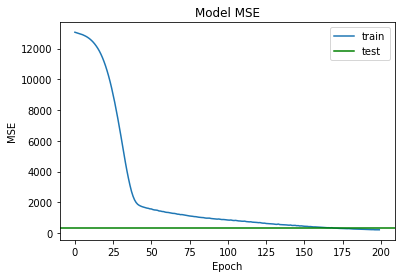

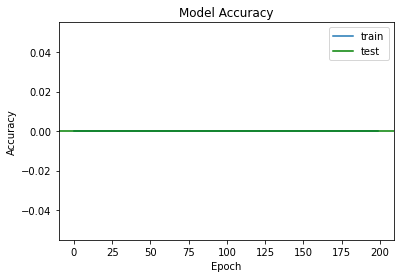

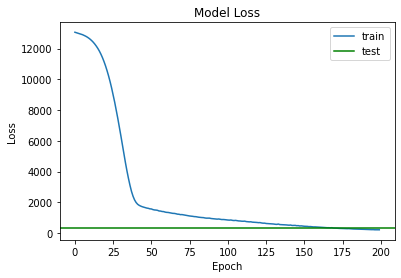

In [33]:
plt.plot(history.history['mean_squared_error'], label='train')
plt.axhline(test_eval[1], color='g', label='test')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.axhline(test_eval[2], color='g', label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.axhline(test_eval[0], color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()